In [104]:
import glob  
folder_list = glob.glob('../data/fruit_classification/train/train/*')
folder_list

['../data/fruit_classification/train/train/Orange',
 '../data/fruit_classification/train/train/Plum',
 '../data/fruit_classification/train/train/Cantaloupe',
 '../data/fruit_classification/train/train/Cherry',
 '../data/fruit_classification/train/train/Cactus fruit',
 '../data/fruit_classification/train/train/Kiwi',
 '../data/fruit_classification/train/train/Pepper Red',
 '../data/fruit_classification/train/train/Tomato',
 '../data/fruit_classification/train/train/Avocado',
 '../data/fruit_classification/train/train/Raspberry',
 '../data/fruit_classification/train/train/Pear',
 '../data/fruit_classification/train/train/Strawberry',
 '../data/fruit_classification/train/train/Apricot',
 '../data/fruit_classification/train/train/Watermelon',
 '../data/fruit_classification/train/train/Potato Red',
 '../data/fruit_classification/train/train/Cucumber Ripe',
 '../data/fruit_classification/train/train/Grape Blue',
 '../data/fruit_classification/train/train/Papaya',
 '../data/fruit_classificati

In [57]:
len(folder_list)

33

In [58]:
file_list = []
for each in folder_list:
    file_list.extend(glob.glob(each + '/*'))

In [59]:
label_name = [each.split('/')[-2] for each in file_list]
label_name  

['Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',
 'Orange',

In [60]:
len(file_list), len(label_name)

(16854, 16854)

In [61]:
import pandas as pd  

file_list_pd = pd.DataFrame({'path': file_list, 'label': label_name})
file_list_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16854 entries, 0 to 16853
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    16854 non-null  object
 1   label   16854 non-null  object
dtypes: object(2)
memory usage: 263.5+ KB


<Axes: xlabel='label'>

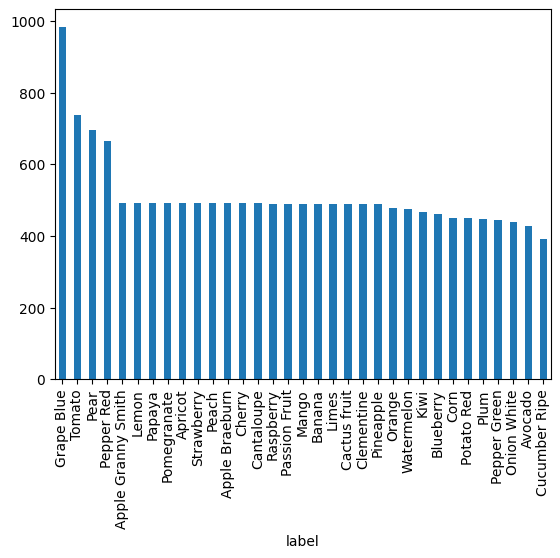

In [62]:
file_list_pd['label'].value_counts().plot.bar()

In [63]:
random_sample = file_list_pd.groupby('label', group_keys = False).apply(lambda x:x.sample(1))
random_sample.head()

,path,label
16061,../data/fruit_classification/train/train/Apple...,Apple Braeburn
10773,../data/fruit_classification/train/train/Apple...,Apple Granny Smith
6408,../data/fruit_classification/train/train/Apric...,Apricot
4415,../data/fruit_classification/train/train/Avoca...,Avocado
13082,../data/fruit_classification/train/train/Banan...,Banana


In [64]:
import matplotlib.pyplot as plt 

def draw_sample_pic_from_file_list(df):
    fig = plt.figure(1, figsize = (24, 20))
    
    cnt = 1  
    for idx, row in df.iterrows():
        if cnt > len(df): break
        plt.subplot(6, 6, cnt) 
        cnt += 1
        image = plt.imread(row['path'])
        plt.imshow(image)
        plt.axis("off")
        plt.title(row['label'])
    plt.tight_layout()
    plt.show()

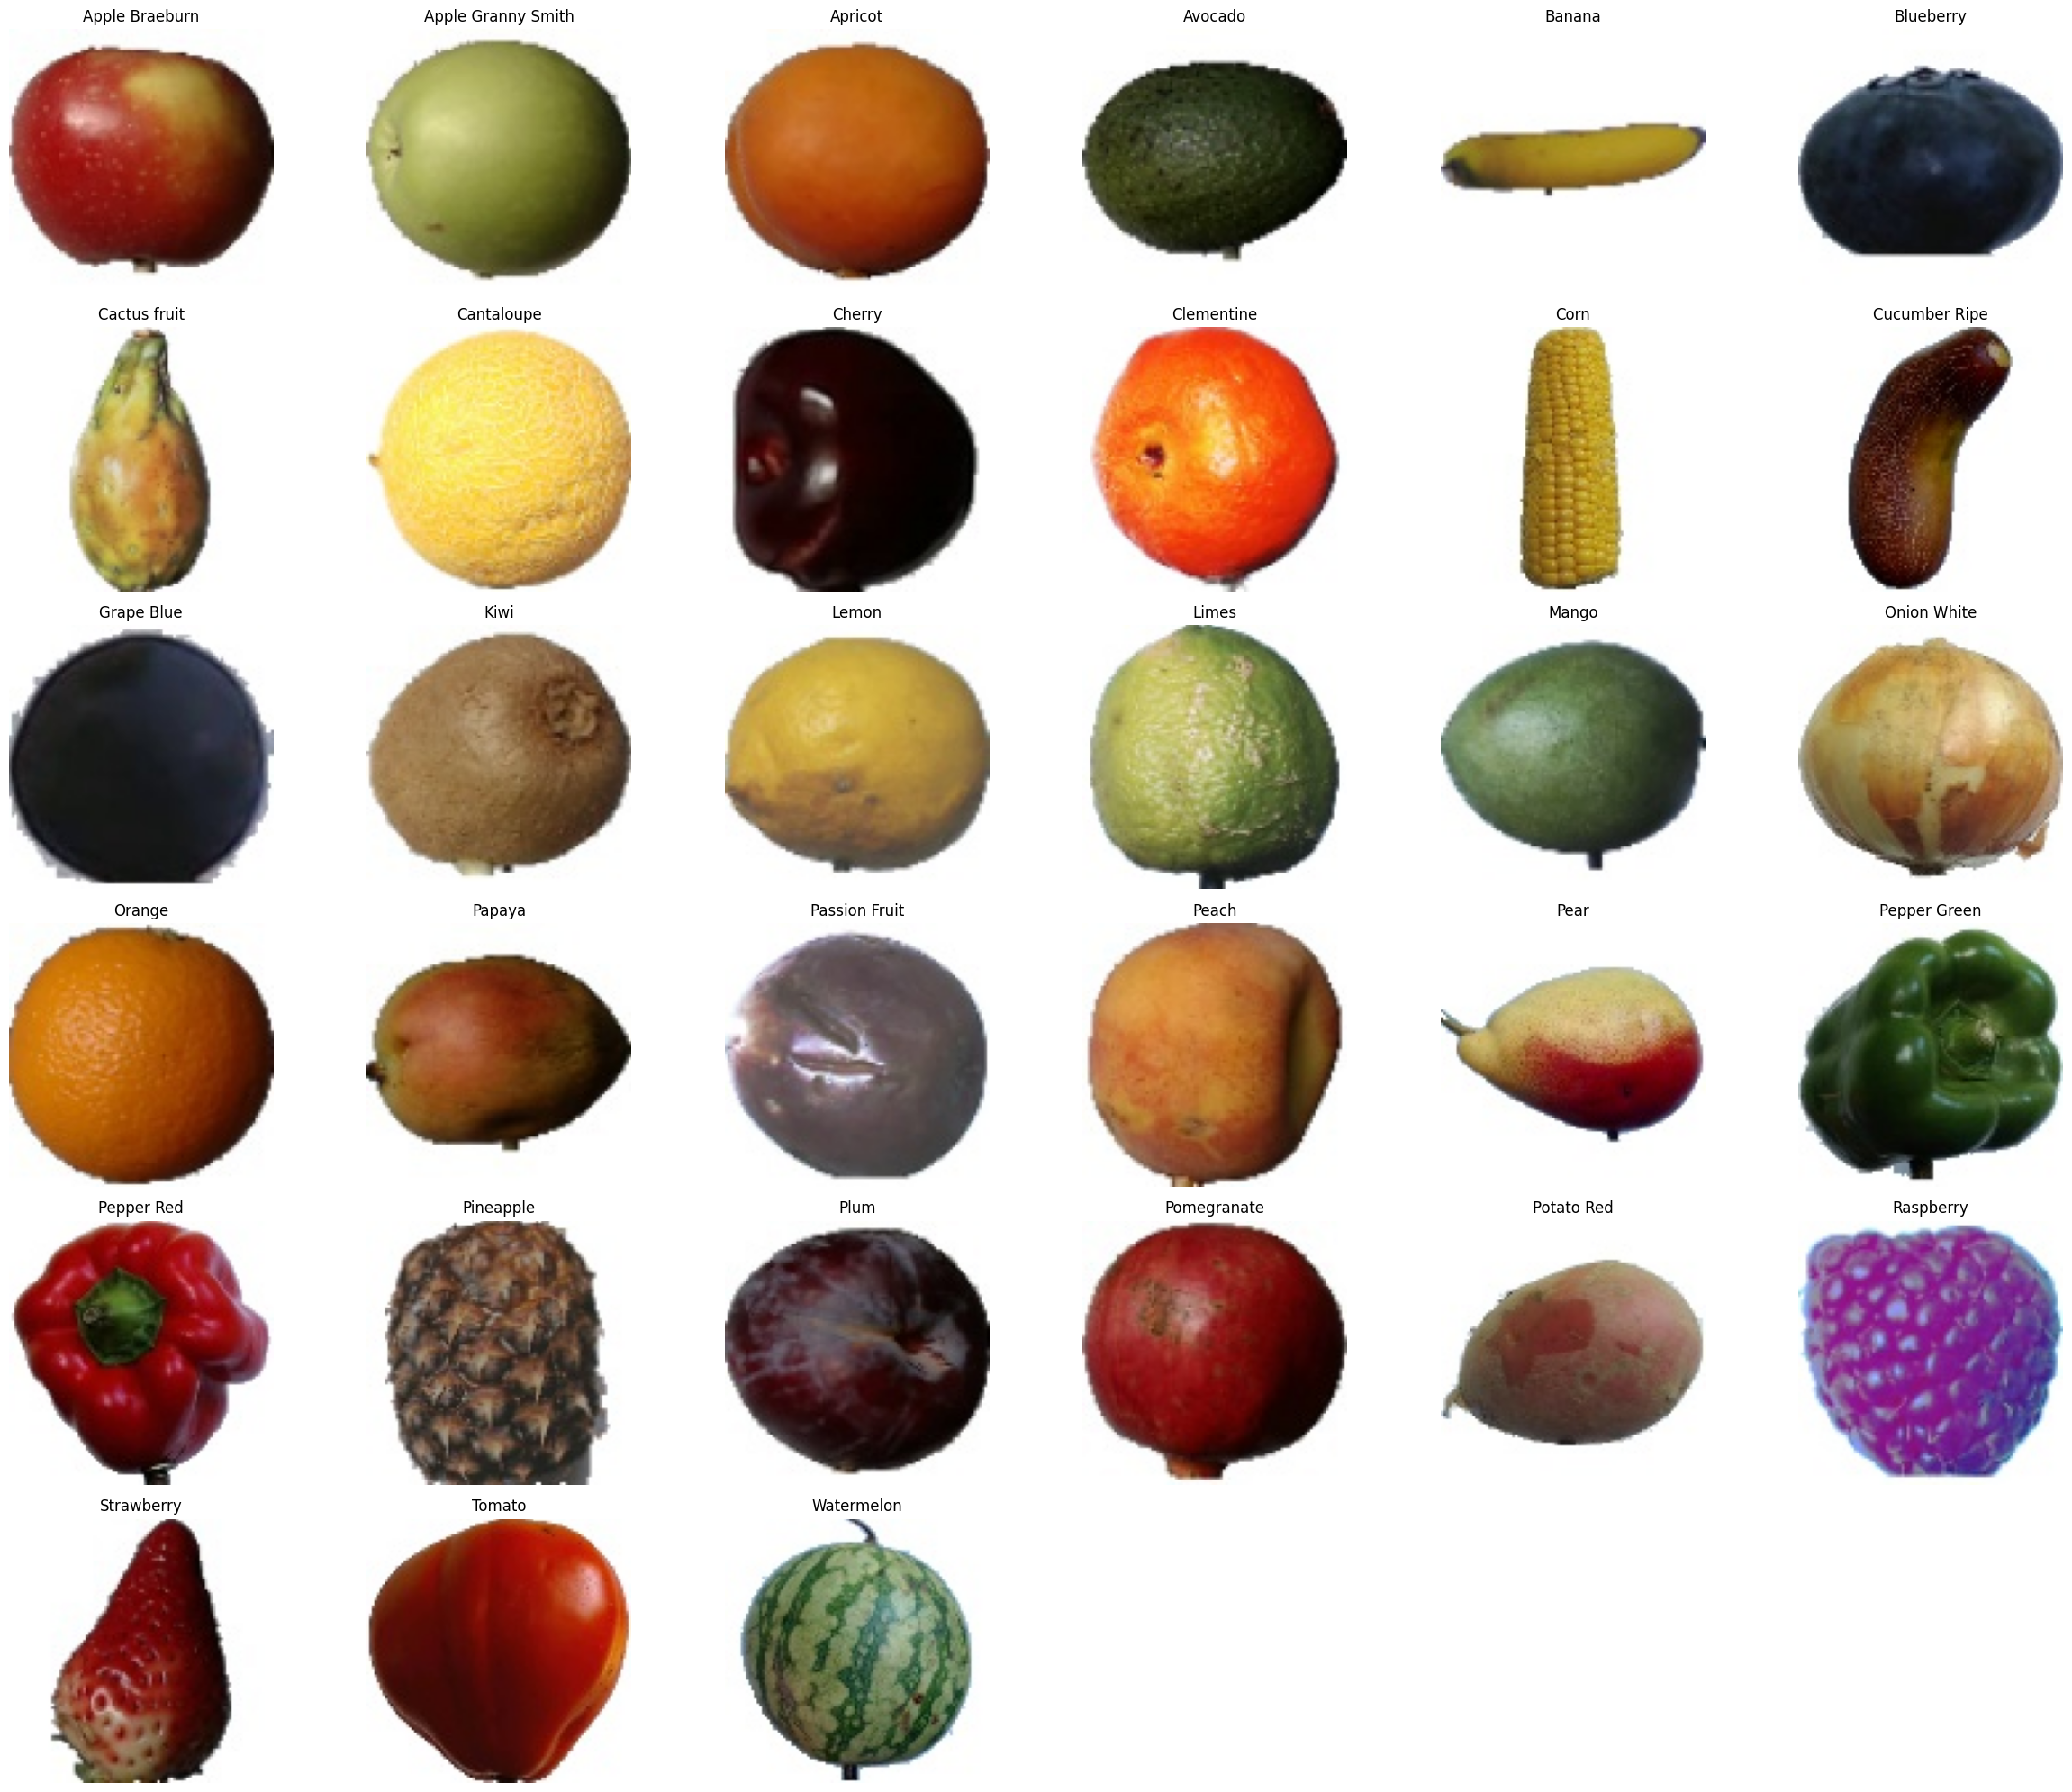

In [65]:
draw_sample_pic_from_file_list(random_sample)

In [66]:
from sklearn.model_selection import train_test_split  
train_data_condi, test_data = train_test_split(file_list_pd, test_size = 0.1, stratify = file_list_pd["label"], random_state = 13)

In [67]:
train_data, val_data = train_test_split(train_data_condi, test_size = 0.2, stratify = train_data_condi["label"], random_state = 13)

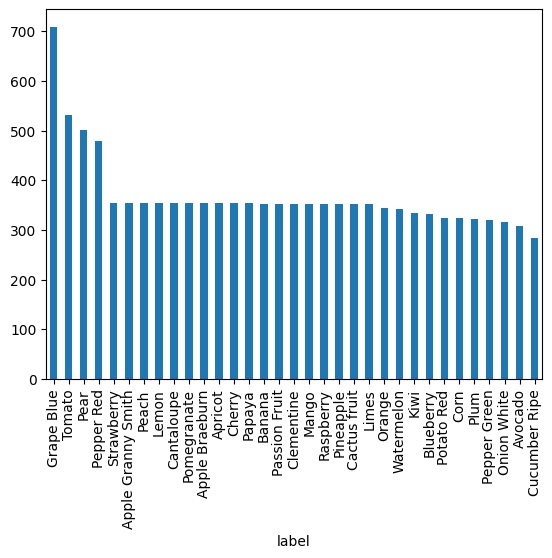

In [68]:
train_data['label'].value_counts().plot.bar();

<Axes: xlabel='label'>

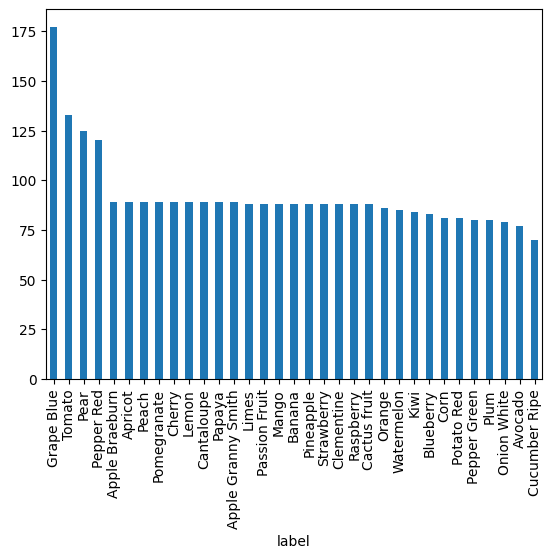

In [69]:
val_data['label'].value_counts().plot.bar()

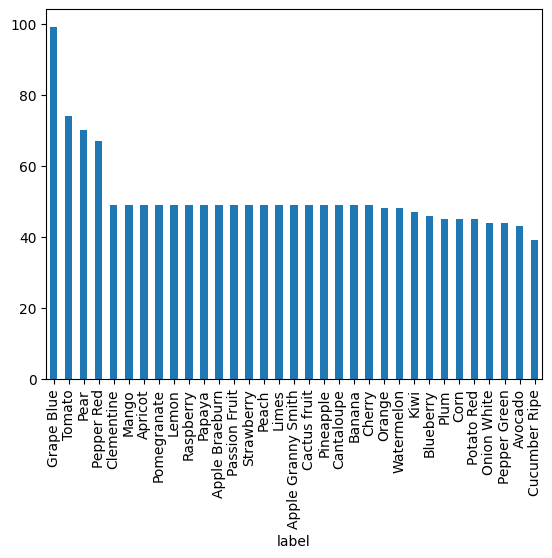

In [70]:
test_data['label'].value_counts().plot.bar();

In [71]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  

train_data_gen = ImageDataGenerator(rescale = 1./255,
                                    horizontal_flip = True,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1)
train_generator = train_data_gen.flow_from_dataframe(
    dataframe = train_data,
    target_size = (150, 150),
    class_mode = 'categorical',
    x_col = 'path',
    y_col = 'label',
)

Found 12134 validated image filenames belonging to 33 classes.


In [72]:
val_data_gen = ImageDataGenerator(rescale = 1./255)
val_generator = val_data_gen.flow_from_dataframe(
    dataframe = val_data,
    x_col = 'path',
    y_col = 'label',
    class_mode = 'categorical',
    target_size = (150, 150),
    seed = 13,
    shuffle = False
)

Found 3034 validated image filenames belonging to 33 classes.


In [77]:
test_data_gen = ImageDataGenerator(rescale = 1./255)
test_generator = test_data_gen.flow_from_dataframe(
    dataframe = test_data,
    x_col = 'path',
    y_col = 'label',
    class_mode = 'categorical',
    target_size = (150, 150),
    seed = 13,
    shuffle = False
)

Found 1686 validated image filenames belonging to 33 classes.


In [78]:
from tensorflow.keras import layers, models  
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3),
                  padding = 'same'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.25),
    layers.Dense(len(folder_list), activation = 'softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 75, 75, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 75, 75, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 37, 37, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_17 (Dropout)        (None, 37, 37, 64)       

In [79]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [80]:
hist = model.fit(
    train_generator, epochs = 5, validation_data = val_generator
)

Epoch 1/5


2023-11-02 11:28:06.825101: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_16/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


380/380 [==============================] - 47s 120ms/step - loss: 1.0231 - accuracy: 0.6839 - val_loss: 0.0559 - val_accuracy: 0.9885
Epoch 2/5
380/380 [==============================] - 43s 113ms/step - loss: 0.1405 - accuracy: 0.9546 - val_loss: 0.0168 - val_accuracy: 0.9957
Epoch 3/5
380/380 [==============================] - 44s 116ms/step - loss: 0.0815 - accuracy: 0.9745 - val_loss: 0.0124 - val_accuracy: 0.9977
Epoch 4/5
380/380 [==============================] - 44s 117ms/step - loss: 0.0610 - accuracy: 0.9808 - val_loss: 0.0196 - val_accuracy: 0.9967
Epoch 5/5
380/380 [==============================] - 44s 114ms/step - loss: 0.0735 - accuracy: 0.9763 - val_loss: 0.0055 - val_accuracy: 0.9993


In [81]:
import matplotlib.pyplot as plt  
import seaborn as sns   

def draw_learning_history(hist, targets, labels, axes_num):
    fig, ax = plt.subplots(1, 2, figsize = (12, 4))
    for i in range(4):
        sns.lineplot(x = range(len(hist.history[targets[i]])),
            y = hist.history[targets[i]], ax = ax[axes_num[i]], label = labels[i]) 
    ax[0].set_title("Loss"); ax[1].set_title("Accuracy")
    sns.despine(); plt.show()

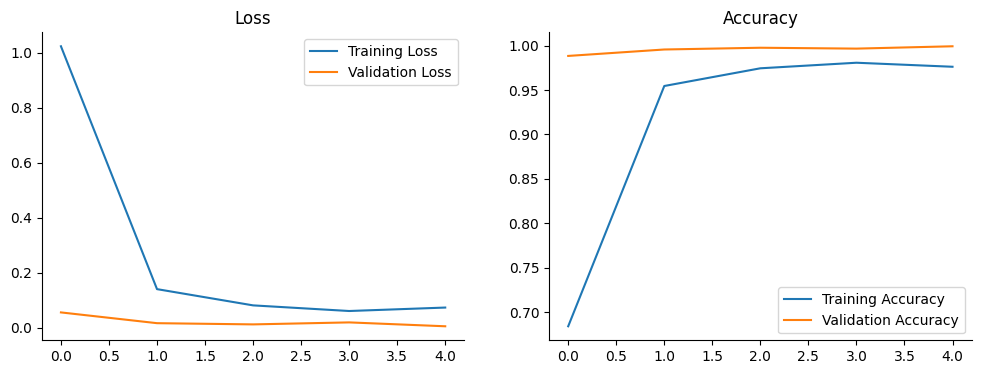

In [82]:
targets = ["loss", "val_loss", "accuracy", "val_accuracy"]
labels = ["Training Loss", "Validation Loss", "Training Accuracy", "Validation Accuracy"]
axes_num = [0, 0, 1, 1]

draw_learning_history(hist, targets, labels, axes_num)

In [83]:
loss, accuracy = model.evaluate(test_generator)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:5f}'.format(accuracy))

53/53 [==============================] - 1s 19ms/step - loss: 0.0046 - accuracy: 0.9988
Loss = 0.00457
Accuracy = 0.998814


In [84]:
idx = 28 
test_tmp = test_data.iloc[idx, 0]
test_tmp  

'../data/fruit_classification/train/train/Strawberry/Strawberry_29.jpg'

In [85]:
import cv2  

image = cv2.imread(test_tmp)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (150, 150))
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [86]:
import matplotlib.image as mpimg  
from skimage.transform import resize  

image = mpimg.imread(test_tmp)
image = resize(image, (150, 150))
image 

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [87]:
image.shape

(150, 150, 3)

In [89]:
image = image.reshape(1, 150, 150, 3)
result = model.predict(image)
result  

1/1 [==============================] - 0s 143ms/step


array([[1.4834996e-05, 3.5264389e-13, 1.4132290e-09, 2.7736415e-13,
        2.8086361e-11, 1.4112120e-12, 6.1963989e-11, 1.0702308e-11,
        7.9756902e-11, 5.3775440e-10, 2.0550657e-11, 4.3360252e-08,
        2.6949676e-14, 2.8607136e-10, 9.5178444e-13, 5.8257484e-13,
        4.4404378e-14, 1.7386046e-11, 1.7043323e-12, 6.4846262e-10,
        8.8053293e-15, 1.4344661e-07, 4.1022759e-08, 7.2211851e-16,
        3.5013767e-07, 2.0710768e-11, 3.0938122e-10, 4.7259954e-07,
        2.6003970e-09, 2.5633036e-11, 9.9998403e-01, 3.0719647e-08,
        1.4924350e-15]], dtype=float32)

In [90]:
test_generator.class_indices

{'Apple Braeburn': 0,
 'Apple Granny Smith': 1,
 'Apricot': 2,
 'Avocado': 3,
 'Banana': 4,
 'Blueberry': 5,
 'Cactus fruit': 6,
 'Cantaloupe': 7,
 'Cherry': 8,
 'Clementine': 9,
 'Corn': 10,
 'Cucumber Ripe': 11,
 'Grape Blue': 12,
 'Kiwi': 13,
 'Lemon': 14,
 'Limes': 15,
 'Mango': 16,
 'Onion White': 17,
 'Orange': 18,
 'Papaya': 19,
 'Passion Fruit': 20,
 'Peach': 21,
 'Pear': 22,
 'Pepper Green': 23,
 'Pepper Red': 24,
 'Pineapple': 25,
 'Plum': 26,
 'Pomegranate': 27,
 'Potato Red': 28,
 'Raspberry': 29,
 'Strawberry': 30,
 'Tomato': 31,
 'Watermelon': 32}

In [92]:
import numpy as np
d  = test_generator.class_indices  
answer = [k for k, v in d.items() if v == np.argmax(result)][0]
answer  

'Strawberry'

In [93]:
def check_pred_one_file(path, label):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (150, 150))
    image = image / 255.
    
    image = image.reshape(1, 150, 150, 3)
    result = model.predict(image, verbose = 0)
    
    answer = [k for k, v in d.items() if v == np.argmax(result)][0]
    return label, answer

In [95]:
idx = 23  
print(check_pred_one_file(test_data.iloc[idx, 0], test_data.iloc[idx, 1]))

('Orange', 'Orange')


In [96]:
from tqdm import tqdm 

wrong_result_path = []
wrong_result_true_label = []
wrong_result = []

d = test_generator.class_indices  

In [97]:
for idx, row in tqdm(test_data.iterrows(), total = test_data.shape[0]):
    label, answer = check_pred_one_file(row['path'], row['label'])
    if label != answer:
        wrong_result_path.append(row['path'])
        wrong_result_true_label.append(row['label'])
        wrong_result.append(answer)

100%|██████████| 1686/1686 [01:05<00:00, 25.72it/s]


In [98]:
wrong_result_pd = pd.DataFrame({
    'label': wrong_result_true_label,
    'predict': wrong_result,
    'path': wrong_result_path})
wrong_result_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   label    0 non-null      float64
 1   predict  0 non-null      float64
 2   path     0 non-null      float64
dtypes: float64(3)
memory usage: 124.0 bytes


In [99]:
wrong_result_pd

,label,predict,path


In [105]:
def draw_sample_pic_from_file_list(df):
    fig = plt.figure(1, figsize = (24, 20))
    cnt = 1
    for idx, row in df.iterrows():
        if cnt > len(df): break
        plt.subplot(6, 6, cnt)
        cnt += 1
        image = plt.imread(row['path']) 
        plt.imshow(image)
        plt.axis('off')
        plt.title('T : ' + row['label'] + ' , ' + 'P : ' + row['predict'])
    plt.tight_layout()
    plt.show()

In [106]:
draw_sample_pic_from_file_list(wrong_result_pd)

<Figure size 2400x2000 with 0 Axes>